## Observations and Insights 

Before beginning the analysis, check the data for duplicate mice and remove any data associated with that mouse ID.

Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

1. Capomulin and Ramicane are clearly the most effective treatments. They ended the study with far more surviving rats than the other treatments.

2. At the beginning of the study, there was almost a 50/50 split of male and female mice.

3. There is a strong positive correlation between Average Tumor Volume vs. Mouse Weight for the Capomulin test subjects.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset on Mouse ID column
combined_study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
# According to mouse_metadata, there are 249 different mice, so this length matches the combined table
combined_study_data["Mouse ID"].value_counts()

g989    13
a699    10
o562    10
c757    10
x402    10
        ..
b447     1
x226     1
o848     1
u153     1
n482     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_study_data[combined_study_data.duplicated(["Mouse ID", "Timepoint"])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = "g989"
dup_mouse_df = combined_study_data.loc[combined_study_data["Mouse ID"] == dup_mouse]
dup_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data = combined_study_data[combined_study_data["Mouse ID"] != "g989"]
clean_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame. New length is 248, which is correct (subtracted 1 from 249 original)
clean_study_data["Mouse ID"].value_counts()

o331    10
o562    10
c757    10
x402    10
y478    10
        ..
b447     1
x226     1
o848     1
u153     1
n482     1
Name: Mouse ID, Length: 248, dtype: int64

In [7]:
clean_study_data["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

## Summary Statistics

Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.
# I'm not sure what this note is asking for, but I found the values for one of the drugs, and could do for all, but I decided to use the better method below to create the table

capomulin = clean_study_data.loc[clean_study_data["Drug Regimen"] == "Capomulin"]
capomulin_vol = capomulin["Tumor Volume (mm3)"]
capomulin_mean = np.mean(capomulin_vol)
capomulin_median = np.median(capomulin_vol)
capomulin_var = np.var(capomulin_vol)
capomulin_std = np.std(capomulin_vol)
capomulin_sem = st.sem(capomulin_vol)
print(f"Capomulin Mean = {capomulin_mean}")
print(f"Capomulin Median = {capomulin_median}")
print(f"Capomulin Variance = {capomulin_var}")
print(f"Capomulin Standard Deviation = {capomulin_std}")
print(f"Capomulin Standard Error (SEM) = {capomulin_sem}")

Capomulin Mean = 40.67574114100001
Capomulin Median = 41.557808879999996
Capomulin Variance = 24.839295580601572
Capomulin Standard Deviation = 4.9839036488079875
Capomulin Standard Error (SEM) = 0.32934562340083096


In [9]:
# Check max and min to get a good idea if variance makes sense
capomulin_min = capomulin["Tumor Volume (mm3)"].min()
capomulin_max = capomulin["Tumor Volume (mm3)"].max()
capomulin_num = len(capomulin)
print(f"Capomulin Min = {capomulin_min}")
print(f"Capomulin Max = {capomulin_max}")
print(f"Total Capomulin data points = {capomulin_num}")
print(capomulin_vol.sort_values())

Capomulin Min = 23.34359787
Capomulin Max = 48.15820939
Total Capomulin data points = 230
19     23.343598
18     25.472143
28     28.167397
17     28.328531
39     28.430964
         ...    
384    47.373423
374    47.488599
440    47.685963
375    48.070452
332    48.158209
Name: Tumor Volume (mm3), Length: 230, dtype: float64


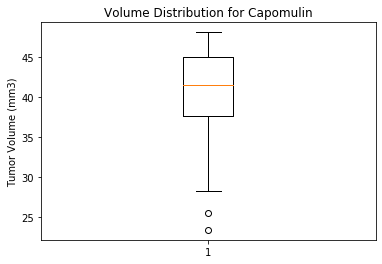

In [10]:
# Check with box and whisker plot to make sure
fig, ax = plt.subplots()
ax.set_title("Volume Distribution for Capomulin")
ax.set_ylabel("Tumor Volume (mm3)")
ax.boxplot(capomulin_vol)
plt.show()

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.
grp_regimens = clean_study_data.groupby(["Drug Regimen"]).mean()
grp_regimens.reset_index()
grp_regimens = grp_regimens[["Tumor Volume (mm3)"]]
grp_regimens = grp_regimens.rename(columns={"Tumor Volume (mm3)":"Mean"})

grp_median = clean_study_data.groupby(["Drug Regimen"]).median()
grp_median.reset_index()
grp_median = grp_median[["Tumor Volume (mm3)"]]
grp_regimens = grp_regimens.merge(grp_median, on="Drug Regimen")
grp_regimens = grp_regimens.rename(columns={"Tumor Volume (mm3)":"Median"})

grp_var = clean_study_data.groupby(["Drug Regimen"]).var()
grp_var.reset_index()
grp_var = grp_var[["Tumor Volume (mm3)"]]
grp_regimens = grp_regimens.merge(grp_var, on="Drug Regimen")
grp_regimens = grp_regimens.rename(columns={"Tumor Volume (mm3)":"Variance"})

grp_std = clean_study_data.groupby(["Drug Regimen"]).std()
grp_std.reset_index()
grp_std = grp_std[["Tumor Volume (mm3)"]]
grp_regimens = grp_regimens.merge(grp_std, on="Drug Regimen")
grp_regimens = grp_regimens.rename(columns={"Tumor Volume (mm3)":"StandDev"})

grp_sem = clean_study_data.groupby(["Drug Regimen"]).sem()
grp_sem.reset_index()
grp_sem = grp_sem[["Tumor Volume (mm3)"]]
grp_regimens = grp_regimens.merge(grp_sem, on="Drug Regimen")
grp_regimens = grp_regimens.rename(columns={"Tumor Volume (mm3)":"SEM"})
grp_regimens

,Mean,Median,Variance,StandDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

Generate a bar plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows  the number of mice per time point for each treatment regimen throughout the course of the study.

NOTE: These plots should look identical.

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study 
# using pandas.
grp_time_regimens = clean_study_data.groupby(["Timepoint","Drug Regimen"], as_index=False).count()
grp_time_regimens.reset_index()
grp_time_regimens = grp_time_regimens[["Timepoint","Drug Regimen","Mouse ID"]]
grp_time_regimens

,Timepoint,Drug Regimen,Mouse ID
0,0,Capomulin,25
1,0,Ceftamin,25
2,0,Infubinol,25
3,0,Ketapril,25
4,0,Naftisol,25
...,...,...,...
95,45,Placebo,11
96,45,Propriva,7
97,45,Ramicane,20
98,45,Stelasyn,11


In [13]:
# Get list of drugs to use for creating dfs
clean_study_data["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

In [14]:
# Individual dfs for each drug, to merge into one dataframe to use for bar graphs
time_capomulin = grp_time_regimens.loc[grp_time_regimens["Drug Regimen"] == "Capomulin"]
time_capomulin.set_index("Timepoint").reset_index()
mice_per_time = time_capomulin[["Timepoint","Mouse ID"]].rename(columns={"Mouse ID":"Capomulin"}).set_index("Timepoint").reset_index()

time_ramicane = grp_time_regimens.loc[grp_time_regimens["Drug Regimen"] == "Ramicane"]
time_ramicane.set_index("Timepoint").reset_index()
mice_ramicane = time_ramicane[["Timepoint","Mouse ID"]].rename(columns={"Mouse ID":"Ramicane"}).set_index("Timepoint").reset_index()
mice_per_time = mice_per_time.merge(mice_ramicane, on="Timepoint")

time_ketapril = grp_time_regimens.loc[grp_time_regimens["Drug Regimen"] == "Ketapril"]
time_ketapril.set_index("Timepoint").reset_index()
mice_ketapril = time_ketapril[["Timepoint","Mouse ID"]].rename(columns={"Mouse ID":"Ketapril"}).set_index("Timepoint").reset_index()
mice_per_time = mice_per_time.merge(mice_ketapril, on="Timepoint")

time_naftisol = grp_time_regimens.loc[grp_time_regimens["Drug Regimen"] == "Naftisol"].set_index("Timepoint").reset_index()
mice_naftisol = time_naftisol[["Timepoint","Mouse ID"]].rename(columns={"Mouse ID":"Naftisol"}).set_index("Timepoint").reset_index()
mice_per_time = mice_per_time.merge(mice_naftisol, on="Timepoint")

time_zoniferol = grp_time_regimens.loc[grp_time_regimens["Drug Regimen"] == "Zoniferol"].set_index("Timepoint").reset_index()
mice_zoniferol = time_zoniferol[["Timepoint","Mouse ID"]].rename(columns={"Mouse ID":"Zoniferol"}).set_index("Timepoint").reset_index()
mice_per_time = mice_per_time.merge(mice_zoniferol, on="Timepoint")

time_stelasyn = grp_time_regimens.loc[grp_time_regimens["Drug Regimen"] == "Stelasyn"].set_index("Timepoint").reset_index()
mice_stelasyn = time_stelasyn[["Timepoint","Mouse ID"]].rename(columns={"Mouse ID":"Stelasyn"}).set_index("Timepoint").reset_index()
mice_per_time = mice_per_time.merge(mice_stelasyn, on="Timepoint")

time_placebo = grp_time_regimens.loc[grp_time_regimens["Drug Regimen"] == "Placebo"].set_index("Timepoint").reset_index()
mice_placebo = time_placebo[["Timepoint","Mouse ID"]].rename(columns={"Mouse ID":"Placebo"}).set_index("Timepoint").reset_index()
mice_per_time = mice_per_time.merge(mice_placebo, on="Timepoint")

time_ceftamin = grp_time_regimens.loc[grp_time_regimens["Drug Regimen"] == "Ceftamin"].set_index("Timepoint").reset_index()
mice_ceftamin = time_ceftamin[["Timepoint","Mouse ID"]].rename(columns={"Mouse ID":"Ceftamin"}).set_index("Timepoint").reset_index()
mice_per_time = mice_per_time.merge(mice_ceftamin, on="Timepoint")

time_infubinol = grp_time_regimens.loc[grp_time_regimens["Drug Regimen"] == "Infubinol"].set_index("Timepoint").reset_index()
mice_infubinol = time_infubinol[["Timepoint","Mouse ID"]].rename(columns={"Mouse ID":"Infubinol"}).set_index("Timepoint").reset_index()
mice_per_time = mice_per_time.merge(mice_infubinol, on="Timepoint")

time_propriva = grp_time_regimens.loc[grp_time_regimens["Drug Regimen"] == "Propriva"].set_index("Timepoint").reset_index()
mice_propriva = time_propriva[["Timepoint","Mouse ID"]].rename(columns={"Mouse ID":"Propriva"}).set_index("Timepoint").reset_index()
mice_per_time = mice_per_time.merge(mice_propriva, on="Timepoint")

# Reassign Timepoint value as string so it's not included in bar chart
mice_per_time["Timepoint"] = mice_per_time["Timepoint"].apply(str)

mice_per_time

,Timepoint,Capomulin,Ramicane,Ketapril,Naftisol,Zoniferol,Stelasyn,Placebo,Ceftamin,Infubinol,Propriva
0,0,25,25,25,25,25,24,25,25,25,24
1,5,25,25,23,23,24,23,24,21,25,23
2,10,25,24,22,21,22,21,24,20,21,21
3,15,24,24,19,21,21,21,20,19,21,15
4,20,23,23,19,20,17,19,19,18,20,15
5,25,22,23,19,18,16,18,17,18,18,13
6,30,22,23,18,15,15,17,15,16,17,12
7,35,22,21,17,15,14,15,14,14,12,9
8,40,21,20,15,15,14,12,12,14,10,9
9,45,21,20,11,13,14,11,11,13,9,7


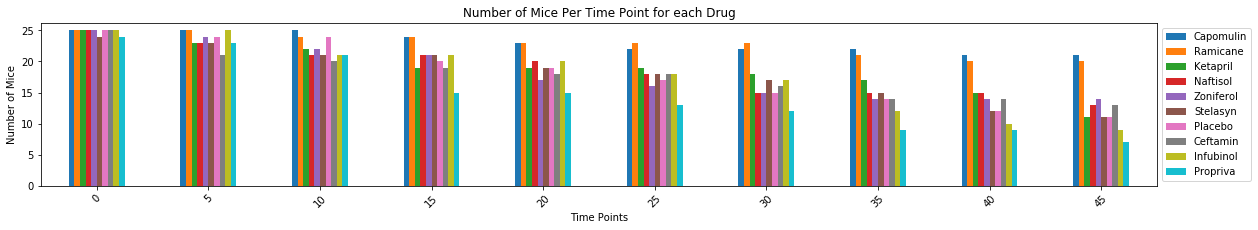

In [15]:
# Bar Plot using pandas
mice_per_time_plot_pd = mice_per_time.plot(kind="bar", figsize=(20,3))
mice_per_time_plot_pd.set_xticklabels(mice_per_time["Timepoint"], rotation=45)
plt.title("Number of Mice Per Time Point for each Drug")
plt.xlabel("Time Points")
plt.ylabel("Number of Mice")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

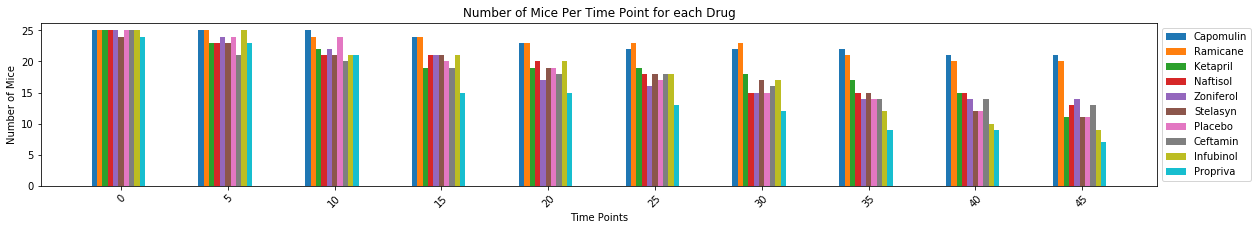

In [16]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study 
# using pyplot (plt.bar).
labels = ["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol","Stelasyn","Placebo","Ceftamin","Infubinol","Propriva"]
x_axis = np.arange(len(mice_per_time["Timepoint"]))
tick_locations = [value for value in x_axis]

fig, ax = plt.subplots(figsize=(20,3))
ax.bar(x_axis - 0.25, mice_per_time["Capomulin"], width = 0.05, align="center")
ax.bar(x_axis - 0.2, mice_per_time["Ramicane"], width = 0.05, align="center")
ax.bar(x_axis - 0.15, mice_per_time["Ketapril"], width = 0.05, align="center")
ax.bar(x_axis - 0.1, mice_per_time["Naftisol"], width = 0.05, align="center")
ax.bar(x_axis - 0.05, mice_per_time["Zoniferol"], width = 0.05, align="center")
ax.bar(x_axis + 0, mice_per_time["Stelasyn"], width = 0.05, align="center")
ax.bar(x_axis + 0.05, mice_per_time["Placebo"], width = 0.05, align="center")
ax.bar(x_axis + 0.1, mice_per_time["Ceftamin"], width = 0.05, align="center")
ax.bar(x_axis + 0.15, mice_per_time["Infubinol"], width = 0.05, align="center")
ax.bar(x_axis + 0.2, mice_per_time["Propriva"], width = 0.05, align="center")


plt.xticks(tick_locations, mice_per_time["Timepoint"], rotation=45)
plt.title("Number of Mice Per Time Point for each Drug")
plt.xlabel("Time Points")
plt.ylabel("Number of Mice")

plt.legend(labels=labels, loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

## Pie Plots

Generate a pie plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the distribution of female or male mice in the study.

NOTE: These plots should look identical.

In [17]:
# Create df with information to be plotted
grp_sex = clean_study_data.loc[clean_study_data["Timepoint"] == 0]
grp_sex = grp_sex.groupby(["Sex"], as_index=False).count()
grp_sex = grp_sex[["Sex","Mouse ID"]]

grp_sex

,Sex,Mouse ID
0,Female,123
1,Male,125


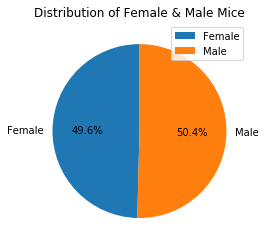

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grp_sex.plot(kind="pie", y="Mouse ID", title=("Distribution of Female & Male Mice"), labels=grp_sex["Sex"], autopct="%1.1f%%", startangle=90, legend=None)
plt.ylabel('')
plt.legend()

plt.show()

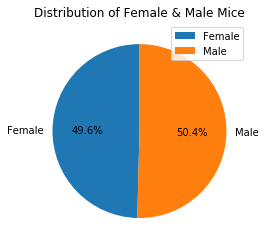

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(grp_sex["Mouse ID"], labels=grp_sex["Sex"], autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Female & Male Mice")
plt.legend()

plt.show()

## Quartiles, Outliers and Boxplots

Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [20]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens (indicated as Capomulin, Ramicane, Infubinol and Ceftamin on homework instructions). 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# I disagree with having Infubinol on the list based on my previous data, but I am using it because that's what's on the homework instructions.
# Capomulin - table already created previously(capomulin = clean_study_data.loc[clean_study_data["Drug Regimen"] == "Capomulin"])
capomulin.reset_index()
capomulin_vol_grp = capomulin.groupby(["Mouse ID"], as_index=False).tail(1).reset_index()
capomulin_vol_grp = capomulin_vol_grp[["Mouse ID","Tumor Volume (mm3)"]].set_index("Mouse ID").reset_index()

quartiles_cap = capomulin_vol_grp["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_cap = quartiles_cap[.25]
upperq_cap = quartiles_cap[.75]
iqr_cap = upperq_cap-lowerq_cap
lower_bound_cap = lowerq_cap-(1.5*iqr_cap)
upper_bound_cap = upperq_cap+(1.5*iqr_cap)

print(f"Lower quartile of Capomulin final tumor volume is {lowerq_cap}")
print(f"Upper quartile of Capomulin final tumor volume is {upperq_cap}")
print(f"Interquartile range of Capomulin final tumor volume is {iqr_cap}")
print(f"Median of Capomulin final tumor volume is {quartiles_cap[.5]}")
print(f"Values below {lower_bound_cap} could be outliers.")
print(f"Values above {upper_bound_cap} could be outliers.")

capomulin_vol = capomulin_vol_grp["Tumor Volume (mm3)"].tolist()
cap_vol_sort = [f"{num:.2f}" for num in capomulin_vol]
cap_vol_sort = [float(i) for i in cap_vol_sort]
cap_vol_sort.sort()
print(f"Total sorted value list is {cap_vol_sort}")

Lower quartile of Capomulin final tumor volume is 32.37735684
Upper quartile of Capomulin final tumor volume is 40.1592203
Interquartile range of Capomulin final tumor volume is 7.781863460000004
Median of Capomulin final tumor volume is 38.125164399999996
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Total sorted value list is [23.34, 28.43, 28.48, 30.49, 31.02, 31.9, 32.38, 33.33, 34.46, 36.04, 37.07, 37.31, 38.13, 38.75, 38.85, 38.94, 38.98, 39.95, 40.16, 40.66, 40.73, 41.48, 41.58, 46.54, 47.69]


In [21]:
# Ramicane table
ramicane = clean_study_data.loc[clean_study_data["Drug Regimen"] == "Ramicane"].reset_index()
ramicane_vol_grp = ramicane.groupby(["Mouse ID"], as_index=False).tail(1).reset_index()
ramicane_vol_grp = ramicane_vol_grp[["Mouse ID","Tumor Volume (mm3)"]].set_index("Mouse ID").reset_index()

quartiles_ram = ramicane_vol_grp["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_ram = quartiles_ram[.25]
upperq_ram = quartiles_ram[.75]
iqr_ram = upperq_ram-lowerq_ram
lower_bound_ram = lowerq_ram-(1.5*iqr_ram)
upper_bound_ram = upperq_ram+(1.5*iqr_ram)

print(f"Lower quartile of Ramicane final tumor volume is {lowerq_ram}")
print(f"Upper quartile of Ramicane final tumor volume is {upperq_ram}")
print(f"Interquartile range of Ramicane final tumor volume is {iqr_ram}")
print(f"Median of Ramicane final tumor volume is {quartiles_ram[.5]}")
print(f"Values below {lower_bound_ram} could be outliers.")
print(f"Values above {upper_bound_ram} could be outliers.")

ramicane_vol = ramicane_vol_grp["Tumor Volume (mm3)"].tolist()
ram_vol_sort = [f"{num:.2f}" for num in ramicane_vol]
ram_vol_sort = [float(i) for i in ram_vol_sort]
ram_vol_sort.sort()
print(f"Total sorted value list is {ram_vol_sort}")

Lower quartile of Ramicane final tumor volume is 31.56046955
Upper quartile of Ramicane final tumor volume is 40.65900627
Interquartile range of Ramicane final tumor volume is 9.098536719999998
Median of Ramicane final tumor volume is 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Total sorted value list is [22.05, 29.13, 30.28, 30.56, 30.64, 31.1, 31.56, 32.98, 33.4, 33.56, 36.13, 36.37, 36.56, 37.23, 37.31, 38.34, 38.41, 38.81, 40.66, 40.67, 43.05, 43.17, 43.42, 44.18, 45.22]


In [22]:
# Infubinol table
infubinol = clean_study_data.loc[clean_study_data["Drug Regimen"] == "Infubinol"].reset_index()
infubinol_vol_grp = infubinol.groupby(["Mouse ID"], as_index=False).tail(1).reset_index()
infubinol_vol_grp = infubinol_vol_grp[["Mouse ID","Tumor Volume (mm3)"]].set_index("Mouse ID").reset_index()

quartiles_inf = infubinol_vol_grp["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_inf = quartiles_inf[.25]
upperq_inf = quartiles_inf[.75]
iqr_inf = upperq_inf-lowerq_inf
lower_bound_inf = lowerq_inf-(1.5*iqr_inf)
upper_bound_inf = upperq_inf+(1.5*iqr_inf)

print(f"Lower quartile of Infubinol final tumor volume is {lowerq_inf}")
print(f"Upper quartile of Infubinol final tumor volume is {upperq_inf}")
print(f"Interquartile range of Infubinol final tumor volume is {iqr_inf}")
print(f"Median of Infubinol final tumor volume is {quartiles_inf[.5]}")
print(f"Values below {lower_bound_inf} could be outliers.")
print(f"Values above {upper_bound_inf} could be outliers.")

infubinol_vol = infubinol_vol_grp["Tumor Volume (mm3)"].tolist()
inf_vol_sort = [f"{num:.2f}" for num in infubinol_vol]
inf_vol_sort = [float(i) for i in inf_vol_sort]
inf_vol_sort.sort()
print(f"Total sorted value list is {inf_vol_sort}")

Lower quartile of Infubinol final tumor volume is 54.04860769
Upper quartile of Infubinol final tumor volume is 65.52574285
Interquartile range of Infubinol final tumor volume is 11.477135160000003
Median of Infubinol final tumor volume is 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Total sorted value list is [36.32, 45.7, 46.25, 47.01, 50.01, 51.54, 54.05, 54.66, 55.63, 55.65, 57.03, 58.27, 60.17, 60.92, 60.97, 62.12, 62.44, 62.75, 65.53, 66.08, 66.2, 67.29, 67.69, 67.97, 72.23]


In [23]:
# Ceftamin table
ceftamin = clean_study_data.loc[clean_study_data["Drug Regimen"] == "Ceftamin"].reset_index()
ceftamin_vol_grp = ceftamin.groupby(["Mouse ID"], as_index=False).tail(1).reset_index()
ceftamin_vol_grp = ceftamin_vol_grp[["Mouse ID","Tumor Volume (mm3)"]].set_index("Mouse ID").reset_index()

quartiles_cef = ceftamin_vol_grp["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_cef = quartiles_cef[.25]
upperq_cef = quartiles_cef[.75]
iqr_cef = upperq_cef-lowerq_cef
lower_bound_cef = lowerq_cef-(1.5*iqr_cef)
upper_bound_cef = upperq_cef+(1.5*iqr_cef)

print(f"Lower quartile of Ceftamin final tumor volume is {lowerq_cef}")
print(f"Upper quartile of Ceftamin final tumor volume is {upperq_cef}")
print(f"Interquartile range of Ceftamin final tumor volume is {iqr_cef}")
print(f"Median of Ceftamin final tumor volume is {quartiles_cef[.5]}")
print(f"Values below {lower_bound_cef} could be outliers.")
print(f"Values above {upper_bound_cef} could be outliers.")

ceftamin_vol = ceftamin_vol_grp["Tumor Volume (mm3)"].tolist()
cef_vol_sort = [f"{num:.2f}" for num in ceftamin_vol]
cef_vol_sort = [float(i) for i in cef_vol_sort]
cef_vol_sort.sort()
print(f"Total sorted value list is {cef_vol_sort}")

Lower quartile of Ceftamin final tumor volume is 48.72207785
Upper quartile of Ceftamin final tumor volume is 64.29983003
Interquartile range of Ceftamin final tumor volume is 15.577752179999997
Median of Ceftamin final tumor volume is 59.85195552
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Total sorted value list is [45.0, 45.0, 45.0, 45.0, 46.78, 47.78, 48.72, 52.93, 55.74, 56.06, 57.92, 59.74, 59.85, 61.39, 61.43, 61.85, 63.0, 64.19, 64.3, 64.63, 64.73, 67.53, 67.75, 68.59, 68.92]


Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.
Hint: All four box plots should be within the same figure. Use this Matplotlib documentation page for help with changing the style of the outliers.

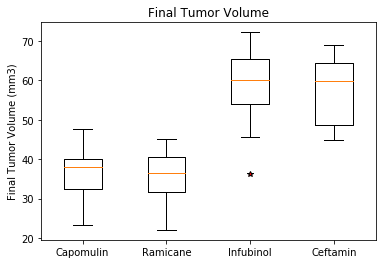

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

top_four = [cap_vol_sort, ram_vol_sort, inf_vol_sort, cef_vol_sort]

red_star = dict(markerfacecolor='r', marker='*')

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
ax1.boxplot(top_four, flierprops=red_star)

plt.show()

## Line and Scatter Plots

Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.

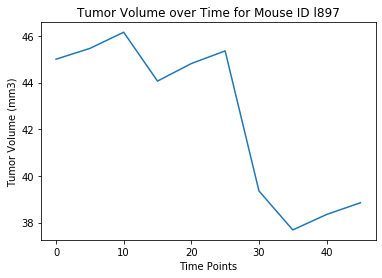

In [25]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Look at list of capomulin mice to pick a value; will pick l897
capomulin_mice = capomulin["Mouse ID"].value_counts()

# Create table to use for line plot
cap_l897 = capomulin.loc[capomulin["Mouse ID"] == "l897"].reset_index()

# Create line plot for l897
plt.plot(cap_l897["Timepoint"], cap_l897["Tumor Volume (mm3)"])
plt.title("Tumor Volume over Time for Mouse ID l897")
plt.xlabel("Time Points")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

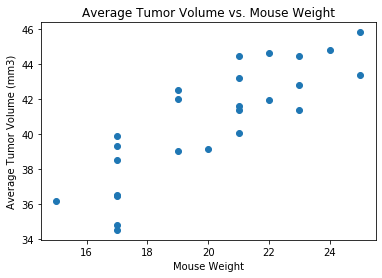

In [26]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Create correct df for creating plot
grp_cap_mice = capomulin.groupby(["Mouse ID"], as_index=False).mean().reset_index()
grp_cap_mice = grp_cap_mice[["Mouse ID","Weight (g)","Tumor Volume (mm3)"]].set_index("Mouse ID").reset_index()

# Create scatter plot
cap_wgt = grp_cap_mice["Weight (g)"]
cap_vol = grp_cap_mice["Tumor Volume (mm3)"]
plt.scatter(cap_wgt, cap_vol)
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Print correlation coefficient
print(f"The correlation coefficient between mouse weight and avg. tumor volume for Capomulin treatment is {round(st.pearsonr(cap_wgt,cap_vol)[0],2)}")

The correlation coefficient between mouse weight and avg. tumor volume for Capomulin treatment is 0.84


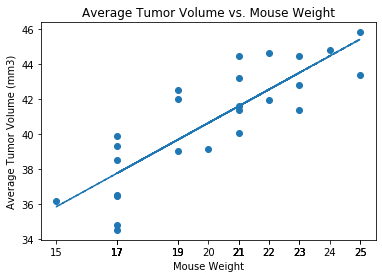

In [28]:
# Plot linear regression model over scatter plot.
vol_slope, vol_int, vol_r, vol_p, vol_std_err = st.linregress(cap_wgt, cap_vol)
vol_fit = vol_slope * cap_wgt + vol_int
plt.scatter(cap_wgt, cap_vol)
plt.plot(cap_wgt,vol_fit,"--")
plt.xticks(cap_wgt)
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()